# prediction of bulldozer price
1. problem defination---->predict the price based on previous prices
2. Data
The data for this competition is split into three parts:<br>
`Train.csv` is the training set, which contains data through the end of 2011.<br>
`Valid.csv` is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions<br>
on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard<br>
`Test.csv` is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.
3. Evaluation
evaluation will be based on RMSLE(Root mean square log error) between the actual and predicted auction prices.
4. Features
see in data dictionary file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('TrainandValid.csv',low_memory=False)
data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

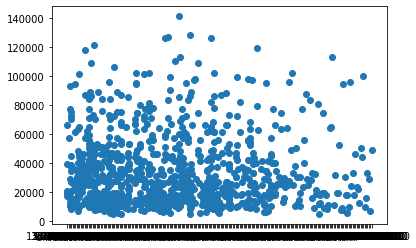

In [4]:
fig,ax=plt.subplots()
ax.scatter(data.saledate[:1000],data.SalePrice[:1000])

<AxesSubplot:ylabel='Frequency'>

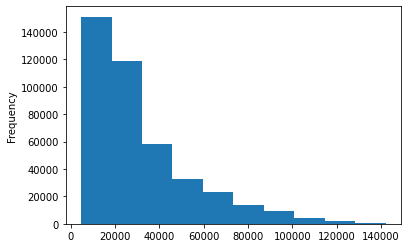

In [5]:
data.SalePrice.plot.hist()

## parsing dates
when we are working with time series data, we want to enrich the time & date component as much as possible.

we can do that by telling pandas which of our columns has dates in it using the `parse_dates` parameter.

In [6]:
# import data again but this time parse dates
df=data.copy()

In [7]:
df=pd.read_csv('TrainandValid.csv',
              low_memory=False,
              parse_dates=['saledate'])

In [8]:
df.saledate.dtype

dtype('<M8[ns]')

In [9]:
df.saledate[:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

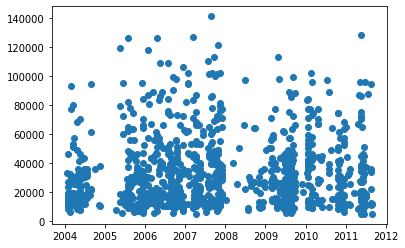

In [10]:
fig,ax=plt.subplots()
ax.scatter(df.saledate[:1000],df.SalePrice[:1000])

## sorting the dates

In [11]:
#sorting the date
df.sort_values(by='saledate',inplace=True,ascending=True)
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

## adding the date parameters

In [12]:
df['saleyear']=df.saledate.dt.year
df['salemonth']=df.saledate.dt.month
df['saleday']=df.saledate.dt.day

In [13]:
df['saledayofweek']=df.saledate.dt.dayofweek
df['saledayofyear']=df.saledate.dt.dayofyear

In [14]:
df.tail(100).T

,406886,407125,404680,408658,409318,410181,408508,411025,409963,406914,...,409202,408976,411695,411319,408889,410879,412476,411927,407124,409203
SalesID,6264781,6266253,4326645,6278653,6284003,6287804,6276594,6304171,6286693,6264861,...,6283634,6282337,6311321,6306476,6281219,6302984,6324811,6313029,6266251,6283635
SalePrice,27500.0,53500.0,19000.0,118000.0,100000.0,45000.0,32000.0,12000.0,17000.0,25000.0,...,35000.0,7500.0,13000.0,53000.0,39000.0,16000.0,6000.0,16000.0,55000.0,34000.0
MachineID,271624,889994,2298378,729887,1843483,1810982,210025,1805710,1832348,206955,...,1930870,1928688,1823846,1278794,1792049,1915521,1919104,1918416,509560,1869284
ModelID,3538,3357,26225,1631,14390,22162,3542,188,4606,3538,...,4701,22072,17311,9114,13976,5266,19330,17244,3357,4701
datasource,149,149,172,149,149,149,149,149,149,149,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,1.0,12.0,1.0,12.0,1.0,12.0,1.0,12.0,1.0,1.0,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
YearMade,1997,1990,1993,2006,2006,1000,2005,1000,1999,2001,...,1998,2005,2005,2004,2000,2001,2004,2004,1993,1000
MachineHoursCurrentMeter,NaN,NaN,7914.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,2012-04-27 00:00:00,2012-04-27 00:00:00,2012-04-27 00:00:00,2012-04-27 00:00:00,2012-04-27 00:00:00,2012-04-27 00:00:00,2012-04-27 00:00:00,2012-04-27 00:00:00,2012-04-27 00:00:00,2012-04-27 00:00:00,...,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00


In [15]:
#now we don't want saledate
df=df.drop(['saledate'],axis=1)

In [16]:
#check the values of different columns
df.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

## turning data into numbers
#### convert string to categories
     we can turn all data into numbers by converting them into pandas categories

In [17]:
# to check whether provided data type is string or not
pd.api.types.is_string_dtype(df['UsageBand'])

True

In [18]:
# find columns which contains string
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [19]:
# this will turn all of the string value into category values
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label]=content.astype('category').cat.as_ordered()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [21]:
# cat= category
#cat.codes convert into numbers
df.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

thanks to pandas categories we now have a way to access all of our data in the form of numbers.

but we still have a bunch of missing data....

In [22]:
# checking missing data
df.isnull().sum()/len(df) # converted into percentage

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

## save preprocessed data

In [23]:
# export current df dataframe
df.to_csv('train_temp.csv',
         index=False)

In [24]:
# import preprocessed data
df=pd.read_csv('train_temp.csv',
              low_memory=False)

In [25]:
df.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


##  fill missing values

### filling numerical values first

In [26]:
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleyear
salemonth
saleday
saledayofweek
saledayofyear


In [27]:
#now we will find which one has missing values
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
# these two have missing values

auctioneerID
MachineHoursCurrentMeter


In [28]:
# fill numeric rows with median 
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df[label+'is_missing']=pd.isnull(content)
            df[label]=content.fillna(content.median())

In [29]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday,saledayofweek,saledayofyear,auctioneerIDis_missing,MachineHoursCurrentMeteris_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,NaN,TD20,...,None or Unspecified,NaN,NaN,1989,1,17,1,17,False,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,NaN,A66,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,NaN,D7G,...,None or Unspecified,NaN,NaN,1989,1,31,1,31,False,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,NaN,A62,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,NaN,D3B,...,Lever,NaN,NaN,1989,1,31,1,31,False,True


In [30]:
# checking how many examples are missing
df.auctioneerIDis_missing.value_counts()

False    392562
True      20136
Name: auctioneerIDis_missing, dtype: int64

In [31]:
df.MachineHoursCurrentMeteris_missing.value_counts()

True     265194
False    147504
Name: MachineHoursCurrentMeteris_missing, dtype: int64

In [32]:
df.isnull().sum()

SalesID                                    0
SalePrice                                  0
MachineID                                  0
ModelID                                    0
datasource                                 0
auctioneerID                               0
YearMade                                   0
MachineHoursCurrentMeter                   0
UsageBand                             339028
fiModelDesc                                0
fiBaseModel                                0
fiSecondaryDesc                       140727
fiModelSeries                         354031
fiModelDescriptor                     337882
ProductSize                           216605
fiProductClassDesc                         0
state                                      0
ProductGroup                               0
ProductGroupDesc                           0
Drive_System                          305611
Enclosure                                334
Forks                                 214983
Pad_Type  

now we don't have any missing values in numeric data type

## filling and turning categorial variables into numbers

In [33]:
# check for columns which aren't numeric
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)
# these all are non-numerical columns

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [34]:
# turn categorical variable into numbers and fill missing
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        #add binary columns to indicate whether sample had missing values
        df[label+'_is_missing']=pd.isnull(content)
        #turn categories into numbers and add+1 because empty values will show -1 and we don't want -ve value
        df[label]=pd.Categorical(content).codes+1

In [35]:
df.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [36]:
df.isnull().sum()
#now we have no missing values

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [37]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1)
model.fit(df.drop('SalePrice',axis=1),df.SalePrice)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## splitting data into train/validation sets

In [38]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [39]:
df['saleyear'].value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleyear, dtype: int64

In [40]:
# split data into training and validation
df_val=df[df.saleyear==2012]
df_train=df[df.saleyear!=2012]
len(df_val),len(df_train)

(11573, 401125)

In [41]:
#split data into x & y
x_train,y_train=df_train.drop('SalePrice',axis=1),df_train.SalePrice
x_val,y_val=df_val.drop('SalePrice',axis=1),df_val.SalePrice

x_train.shape,y_train.shape,x_val.shape,y_val.shape

((401125, 102), (401125,), (11573, 102), (11573,))

## Building an evaluation function

In [42]:
# create evaluation function(RMSLE)
from sklearn.metrics import mean_squared_log_error,mean_squared_error,mean_absolute_error,r2_score

def rmsle(y_test,y_preds):
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

# create function to evaluate model on a few different levels
def show_scores(model):
    train_preds=model.predict(x_train)
    val_preds=model.predict(x_val)
    scores={'Training MAE':mean_squared_error(y_train,train_preds),
           'valid MAE': mean_absolute_error(y_val,val_preds),
            'Training RMSLE': rmsle(y_train,train_preds),
            'valid RMSLE': rmsle(y_val,val_preds),
            'Training R^2': r2_score(y_train,train_preds),
            'valid R^2': r2_score(y_val,val_preds)}
    return scores

## testing our model on a subset (to tune the hyperparameter)

In [43]:
len(x_train)

401125

In [44]:
#change max_sample value
model=RandomForestRegressor(n_jobs=-1,
                           random_state=42)
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [45]:
(x_train.shape[0]*100)/1000000

40.1125

In [46]:
#cutting down on the max number of sample each stimator can see improves training time
# %%time
model.fit(x_train,y_train)
#it should take less time but taking long

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [47]:
show_scores(model)

{'Training MAE': 6625705.927047665,
 'valid MAE': 6120.959637950402,
 'Training RMSLE': 0.08426351714047395,
 'valid RMSLE': 0.25557446689440955,
 'Training R^2': 0.9875150955953674,
 'valid R^2': 0.8727175969771312}

## hypterparameter with randomizedSearchCV

In [48]:
%%time
from sklearn.model_selection import RandomizedSearchCV
rf_grid={'n_estimators':np.arange(10,100,10),
      'max_depth':[None,3,5,10],
      'min_samples_split':np.arange(2,20,2),
      'min_samples_leaf':np.arange(1,20,2),
      'max_features':[0.5,1,'sqrt','auto'],
      'max_samples':[10000]}

# initiate randomizedsearchCV
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                 random_state=42),
                           param_distributions=rf_grid,
                           n_iter=2,
                           cv=5,
                           verbose=True)
# fit the randomized search CV model
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.0min finished


Wall time: 1min 7s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [49]:
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 4,
 'min_samples_leaf': 7,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': 5}

## training model with best parameters

NOTE: these ideal parameter were found after 100 interations

In [50]:
%%time

#most ideal hyper parameter
ideal_model=RandomForestRegressor(n_estimators= 40,
     min_samples_split= 14,
    min_samples_leaf= 1,
     max_samples= None,
     max_features= 0.5)

#fit the ideal model
ideal_model.fit(x_train,y_train)

Wall time: 4min 16s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=14, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [51]:
# scores for ideal model
show_scores(ideal_model)

{'Training MAE': 21662698.802830264,
 'valid MAE': 5941.7487601546345,
 'Training RMSLE': 0.14433937410517092,
 'valid RMSLE': 0.24569126186652085,
 'Training R^2': 0.9591806930948116,
 'valid R^2': 0.8821059175306463}

In [52]:
df_test=pd.read_csv('Test.csv',
                   low_memory=False,
                   parse_dates=['saledate'])
df_test.head()



,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [53]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [54]:
df_test.isnull().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

we have to make this data similar to our preprocessed data

## preprocessing the data (setting up the same formate as previously done)

In [55]:
def pre_process(df_test):
    df_test['saleyear']=df_test.saledate.dt.year
    df_test['salemonth']=df_test.saledate.dt.month
    df_test['saleday']=df_test.saledate.dt.day
    df_test['saledayofweek']=df_test.saledate.dt.dayofweek
    df_test['saledayofyear']=df_test.saledate.dt.dayofyear
    df_test.drop('saledate',axis=1,inplace=True)
    
    # converting the string into categories
    for label,content in df_test.items():
        if pd.api.types.is_string_dtype(content):
            df_test[label]=content.astype('category').cat.as_ordered()
    #fill the numerical rows with median
    for label,content in df_test.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df_test[label+'is_missing']=pd.isnull(content)
                df_test[label]=content.fillna(content.median())
    #fill the categorical missing data and turned into numbers
    for label,content in df_test.items():
        if not pd.api.types.is_numeric_dtype(content):
            df_test[label+'_is_missing']=pd.isnull(content)
            df_test[label]=pd.Categorical(content).codes+1
    return df_test


In [56]:
pre_process(df_test)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True


In [57]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 101 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(45), float64(1), int16(2), int64(11), int8(42)
memory usage: 2.2 MB


In [58]:
set(x_train.columns)-set(df_test.columns)

{'auctioneerIDis_missing'}

In [67]:
df_test['acutioneerIDis_missing']=False

In [68]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,acutioneerIDis_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [69]:
# make prediction on the data set
test_preds=ideal_model.predict(df_test)

In [70]:
len(test_preds)

12457

In [72]:
# format prediction into the same format kaggle is after
df_preds=pd.DataFrame()
df_preds['SalesID']=df_test['SalesID']
df_preds['SalesPrice']=test_preds
df_preds

,SalesID,SalesPrice
0,1227829,19329.536874
1,1227844,23508.603303
2,1227847,49661.412929
3,1227848,59367.782748
4,1227863,44169.019994
...,...,...
12452,6643171,50919.383620
12453,6643173,13786.835977
12454,6643184,12680.117691
12455,6643186,18247.532601


In [73]:
# export predictions data
df_preds.to_csv('test_prediction.csv',index=False)

## feature Importance

In [75]:
#find feature importance of our best model
importances=ideal_model.feature_importances_

In [80]:
# Helper function for plotting feature importance
def plot_features(columns,importance,n=20):
    df=(pd.DataFrame({'features':columns,
                     'feature_importance':importances})
       .sort_values('feature_importance',ascending=False)
       .reset_index(drop=True))
    
    # plot the data frame
    fig,ax=plt.subplots()
    ax.barh(df['features'][:n],df['feature_importance'][:20])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature importance')

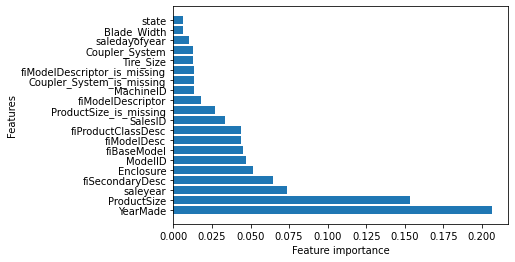

In [81]:
plot_features(x_train.columns,importances)